## OpenCV image and video  
* many image libraries in python  
* OpenCV single image processing  
* OpenCv video processing

#### comparing OpenCV and other packages

#### PIL

Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


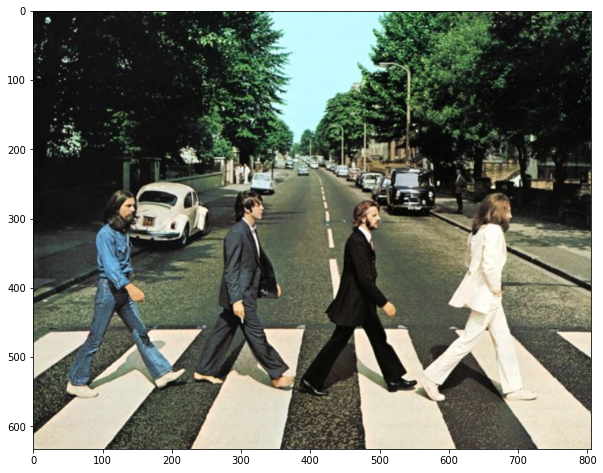

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

# PIL은 open() 으로 image file 읽어 ImageFile객체 생성
pil_image = Image.open('D:/jupyter_dir/DLCV/data/image/beatles01.jpg')
print('Image type:', type(pil_image))

plt.figure(figsize=(10,10))
plt.imshow(pil_image)

#### scikit image(skimage)  
RGB->RGB

sk_image type: <class 'numpy.ndarray'> sk_image shape: (633, 806, 3)


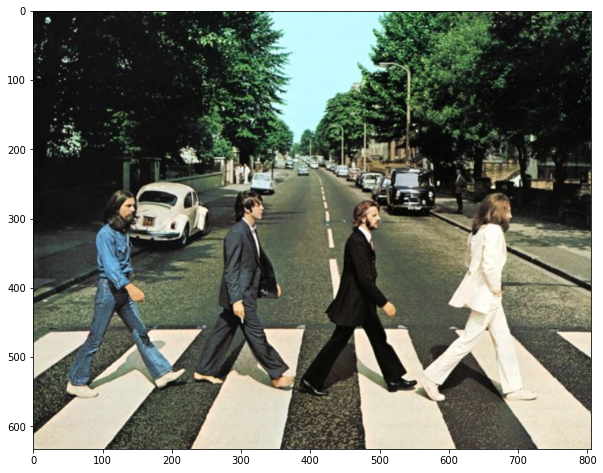

In [4]:
from skimage import io
# skimage는 imread()이용해 image를 numpy 배열로 반환
sk_image = io.imread("D:/jupyter_dir/DLCV/data/image/beatles01.jpg")
print('sk_image type:', type(sk_image), 'sk_image shape:', sk_image.shape)

plt.figure(figsize=(10,10))
plt.imshow(sk_image)


### OpenCV

* imread() : RGB->BGR  
* imwrite() : BGR -> RGB

cv_image type: <class 'numpy.ndarray'> cv_image shape: (633, 806, 3)


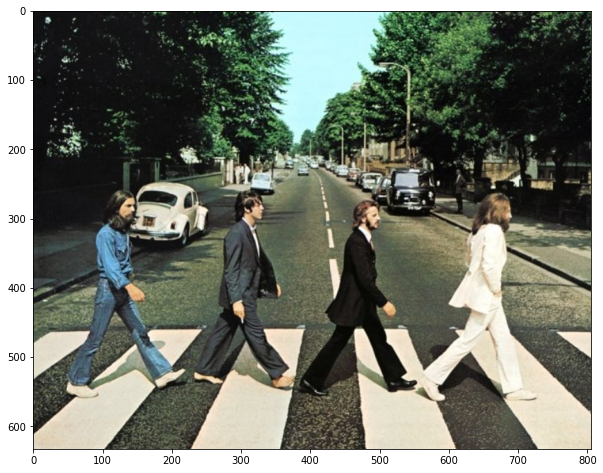

In [6]:
import cv2 

cv2_image = cv2.imread('D:/jupyter_dir/DLCV/data/image/beatles01.jpg')
cv2.imwrite('D:/jupyter_dir/DLCV/data/output/beatles01_cv.jpg', cv2_image)
print('cv_image type:', type(cv2_image), 'cv_image shape:', cv2_image.shape)

plt.figure(figsize=(10,10))
img = plt.imread('D:/jupyter_dir/DLCV/data/output/beatles01_cv.jpg')
plt.imshow(img)

#### OpenCV imread()로 반환된 이미지 넘파이 배열 그대로 시각화

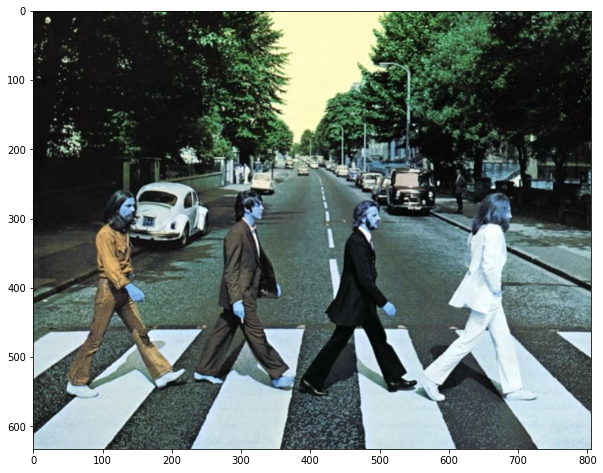

In [7]:
cv2_image = cv2.imread('D:/jupyter_dir/DLCV/data/image/beatles01.jpg')

plt.figure(figsize=(10,10))
plt.imshow(cv2_image)
plt.show()

In [8]:
sk_image = io.imread('D:/jupyter_dir/DLCV/data/image/beatles01.jpg')
print(sk_image.shape)
sk_image[:, :, 0]

(633, 806, 3)


array([[ 18,  18,  18, ...,  47,  39,  64],
       [ 19,  19,  18, ...,  72,  41,  37],
       [ 18,  18,  18, ...,  84,  56,  41],
       ...,
       [225, 226, 228, ..., 231, 230, 229],
       [225, 225, 226, ..., 229, 229, 227],
       [225, 225, 224, ..., 227, 227, 227]], dtype=uint8)

In [9]:
cv2_image = cv2.imread('D:/jupyter_dir/DLCV/data/image/beatles01.jpg')
print(type(cv2_image))
print(cv2_image.shape)
cv2_image[:,:,0]

<class 'numpy.ndarray'>
(633, 806, 3)


array([[ 19,  19,  20, ...,  47,  39,  64],
       [ 20,  20,  20, ...,  71,  40,  36],
       [ 20,  20,  20, ...,  82,  54,  40],
       ...,
       [198, 199, 201, ..., 190, 189, 188],
       [198, 198, 199, ..., 188, 188, 186],
       [199, 199, 198, ..., 186, 186, 186]], dtype=uint8)

In [10]:
cv2_image[:,:,2]

array([[ 18,  18,  18, ...,  47,  39,  64],
       [ 19,  19,  18, ...,  72,  41,  37],
       [ 18,  18,  18, ...,  84,  56,  41],
       ...,
       [225, 226, 228, ..., 231, 230, 229],
       [225, 225, 226, ..., 229, 229, 227],
       [225, 225, 224, ..., 227, 227, 227]], dtype=uint8)

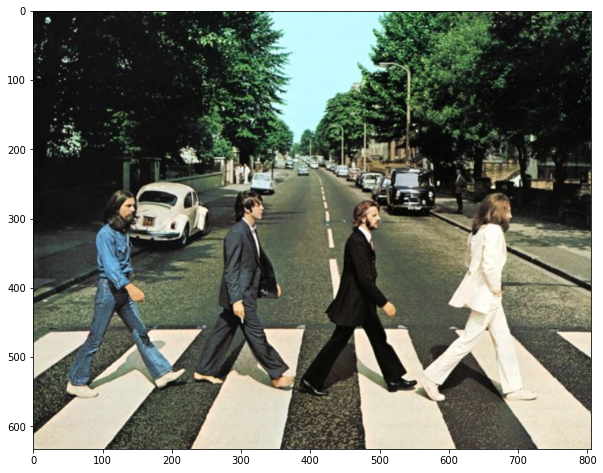

In [11]:
cv2_image = cv2.imread('D:/jupyter_dir/DLCV/data/image/beatles01.jpg')
draw_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(draw_image)
plt.show()

#### Opencv video processing

* opencv has simple video processing API
* VideoCapture object can capture Video as a frame
* VideoWriter object write frame that videocapture object captured

In [19]:
from IPython.display import clear_output, Image, display, Video, HTML
Video('D;/jupyter_dir/DLCV/data/video/Night_Day_Chase.mp4', embed=True)

In [8]:
import cv2

video_input_path = 'D:/jupyter_dir/DLCV/data/video/Night_Day_Chase.mp4'
# linux에서 video output 확장자는 반드시 avi
video_output_path = 'D:/jupyter_dir/DLCV/data/output/Night_Day_Chase_output.avi'

cap = cv2.VideoCapture(video_input_path)
# Codec은 *'XVID'
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) # (200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS)

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame크기:', vid_size)

총 Frame 갯수: 1383 FPS: 28 Frame크기: (1216, 516)


In [9]:
import time 
green_color = (0, 255, 0)
red_color = (0, 0, 255)

start = time.time()
index = 0
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    if index % 100 == 0:
        print('frame:', index, '처리 완료')
    
    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = 'frame:{}'.format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)
    
    vid_writer.write(img_frame)
    
print('write 완료시간:', round(time.time() - start, 4))
vid_writer.release()
cap.release()

frame: 100 처리 완료
frame: 200 처리 완료
frame: 300 처리 완료
frame: 400 처리 완료
frame: 500 처리 완료
frame: 600 처리 완료
frame: 700 처리 완료
frame: 800 처리 완료
frame: 900 처리 완료
frame: 1000 처리 완료
frame: 1100 처리 완료
frame: 1200 처리 완료
frame: 1300 처리 완료
더 이상 처리할 frame이 없습니다.
write 완료시간: 11.3197


google cloud로 복사하기

In [ ]:
!gsutil cp D:/jupyter_dir/DLCV/data/output/Night_Day_Chase_output.avi gs://my_dlcv_bucket/data/output/Night_Day_Chase_output.avi